### Dont edit this



In [8]:
import requests
import matplotlib.pylab as plt
import json

# Helper
def name_to_b58(hotspot_name):
    return list(filter(lambda x: '-'.join(x['name'].lower().split(' ')) == hotspot_name,
                       HOTSPOTS))[0]['address']

def b58_to_name(hb58):
    return list(filter(lambda x: x['address'] == hb58, HOTSPOTS))[0]['name']

def get_witnesses_by_name(hname):
    hotspot = name_to_b58(hname)

    witness_resp = requests.get('{}/witnesses/{}'.format(API, hotspot))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_witnesses(hb58):
    witness_resp = requests.get('{}/witnesses/{}'.format(API, hb58))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_path(challenge_id):
    challenge_resp = requests.get('{}/challenges/{}'.format(API, challenge_id))
    assert(challenge_resp.status_code == 200)
    
    path = challenge_resp.json()['data']['pathElements']
    addresses = [p['address'] for p in path]
    return addresses

def plot_single_witness_by_name(hname, wname):
    witnesses = get_witnesses_by_name(hname)
    for witness in witnesses:
        if '-'.join(witness['name'].lower().split(' ')) == wname:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(wname, hname))
            # print(w_name)
            # print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

def plot_single_witness(hb58, wb58):
    witnesses = get_witnesses(hb58)
    for witness in witnesses:
        if witness['address'] == wb58:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(w_name, b58_to_name(hb58)))
            # print(w_name)
            print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

# Constants, don't touch this
API = 'https://explorer.helium.foundation/api'
hotspots_resp = requests.get("{}/hotspots".format(API))
assert(hotspots_resp.status_code == 200)
HOTSPOTS = hotspots_resp.json()['data']

### Edit challenge_id to get path RSSI histograms

In [2]:
challenge_id = 1982662

In [3]:
path_b58_addrs = get_path(challenge_id)

In [4]:
path_b58_addrs

['11JdFzefASzjwcLXwCMFoRVQUTsRQXeoUvxb1QrxA9DfusQDMJe',
 '112m48zP6UC1yCZkBtUn15vRUk38rPBqJQeoZdZvPHjL4a88uxkc',
 '112D3XJmbB4ouvhLkDcCJLe7HW8Ae4WFPzTcPDGQ4qE2Aiwwsqq3',
 '112CKyEQZ5VqfxxdD2VefrvDHsufQYt1uchs2oaXF14CBCCn44XE',
 '11a9u2Dkh3LjkbXYiCH3dendQySrdhLGyYWJYUcLMspESnhczsk',
 '112k9k4VAqfQAtYJGbgnVgvMjdR6FxYy3SmfRTmyeYptAna5ZBYJ',
 '112AcxRDthui2r5PJwHvNjkRrW7nD9At6Kqh7YgPUqweoQGjeZPV']

In [5]:
path_names = [b58_to_name(i) for i in path_b58_addrs]
path_names

['Energetic Lavender Squirrel',
 'Joyous Foggy Snail',
 'Breezy Tangelo Nuthatch',
 'Ripe Porcelain Stallion',
 'Bubbly Pastel Ant',
 'Tangy Shadow Halibut',
 'Jolly Peach Starfish']

In [6]:
def plot_path_rssi_hist(path):
  path_length = len(path)
  i = 0
  while i < path_length:
      if i == path_length - 1:
          print('done')
      else:
          h = path[i]
          w = path[i + 1]
          plot_single_witness(h, w)
      i += 1
  return

Joyous Foggy Snail has witnessed Energetic Lavender Squirrel at these RSSI values
{'-132': 0, '-123': 276, '-114': 297, '-106': 541, '-97': 4, '-88': 0, '-80': 0, '-71': 0, '-63': 0, '-54': 0, '28': 11}


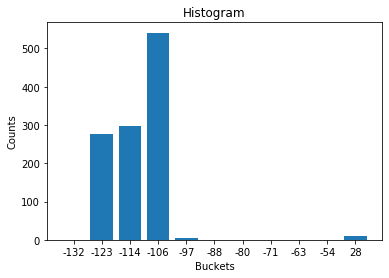

Breezy Tangelo Nuthatch has witnessed Joyous Foggy Snail at these RSSI values
{'-132': 0, '-124': 0, '-116': 21, '-108': 348, '-101': 205, '-93': 0, '-85': 0, '-77': 0, '-70': 0, '-62': 0, '28': 6}


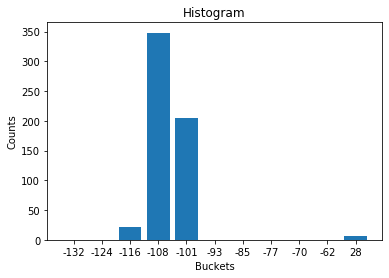

Ripe Porcelain Stallion has witnessed Breezy Tangelo Nuthatch at these RSSI values
{'-132': 0, '-124': 13, '-116': 48, '-108': 346, '-100': 98, '-92': 0, '-84': 0, '-76': 0, '-68': 0, '-60': 0, '28': 6}


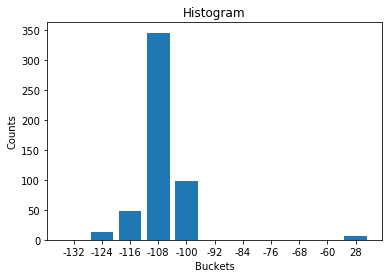

Bubbly Pastel Ant has witnessed Ripe Porcelain Stallion at these RSSI values
{'-132': 0, '-124': 13, '-116': 296, '-108': 393, '-100': 288, '-92': 1, '-84': 0, '-76': 0, '-68': 0, '-60': 0, '28': 14}


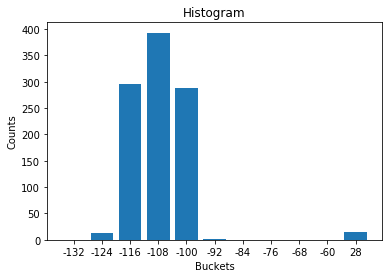

Tangy Shadow Halibut has witnessed Bubbly Pastel Ant at these RSSI values
{'-132': 0, '-124': 0, '-116': 0, '-108': 0, '-101': 30, '-93': 452, '-85': 12, '-77': 0, '-70': 0, '-62': 0, '28': 12}


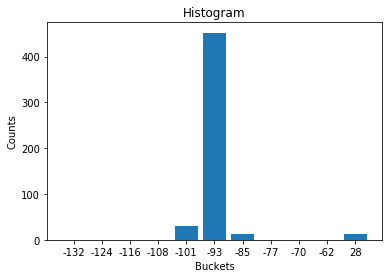

Jolly Peach Starfish has witnessed Tangy Shadow Halibut at these RSSI values
{'-132': 0, '-124': 0, '-116': 0, '-108': 9, '-100': 260, '-92': 226, '-85': 0, '-77': 0, '-69': 0, '-61': 0, '28': 22}


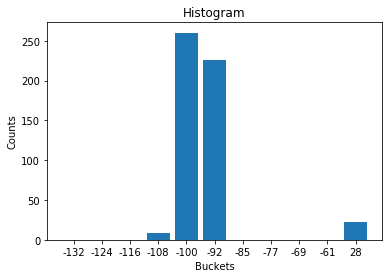

done


In [7]:
plot_path_rssi_hist(path_b58_addrs)

### Edit hotspot_name and witness_name to get RSSI hist

shaggy-quartz-rook has witnessed zealous-frost-sloth at these RSSI values


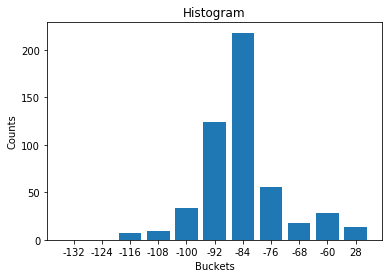

In [10]:
plot_single_witness_by_name("zealous-frost-sloth", "shaggy-quartz-rook")

### For getting ALL witness RSSIs

In [9]:
def plot_witnesses_for(name):
    witnesses = get_witnesses_by_name(name)

    for w in witnesses:
        hist = w['hist']
        address = w['address']
        name = w['name']
#         print(hist)
        plt.bar(range(len(hist)), list(hist.values()), align='center')
        plt.xticks(range(len(hist)), list(hist.keys()))
        plt.title(name)
        plt.xlabel('Buckets')
        plt.ylabel('Counts')
        plt.show()

In [10]:
hotspots = ["energetic-lavender-squirrel",
"ripe-porcelain-stallion",
"breezy-tangelo-nuthatch",
"clumsy-midnight-wren",
"late-parchment-mantaray",
"wonderful-ceramic-wren",
"joyful-rose-wallaby",
"dandy-pastel-snake",
"unique-brick-guppy",
"jolly-peach-starfish",
"joyous-foggy-snail",
"bubbly-pastel-ant"]

Plotting witnesses for: energetic-lavender-squirrel


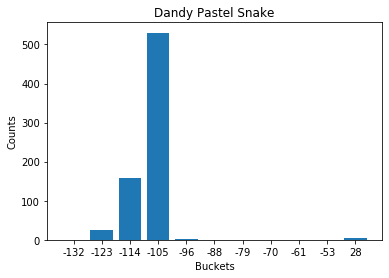

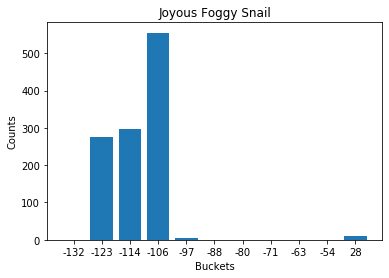

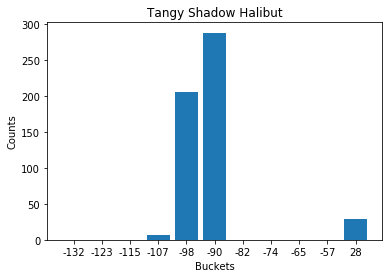

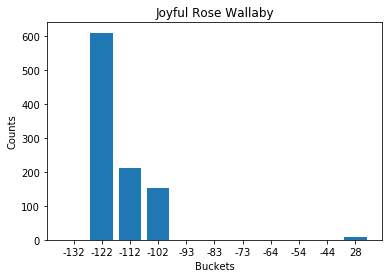

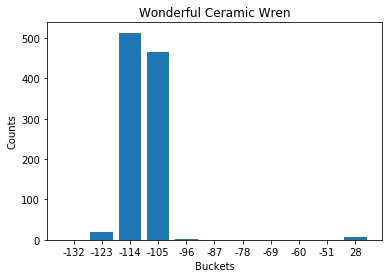

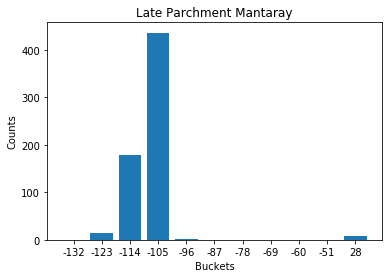

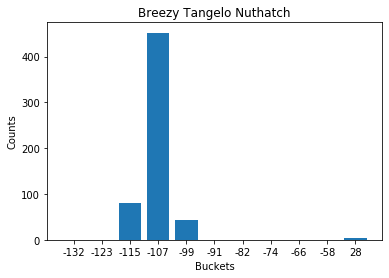

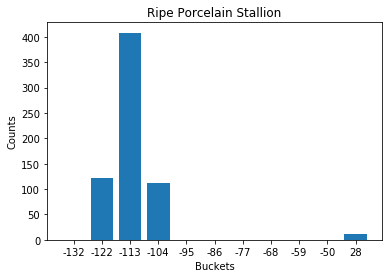

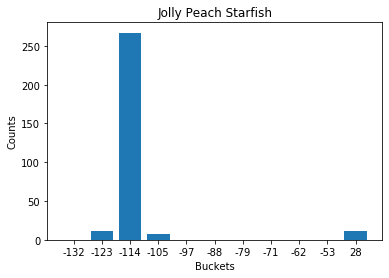

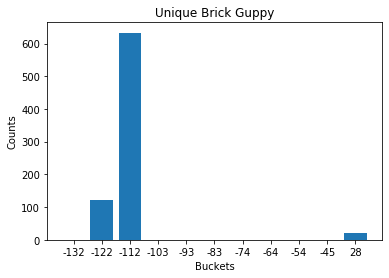

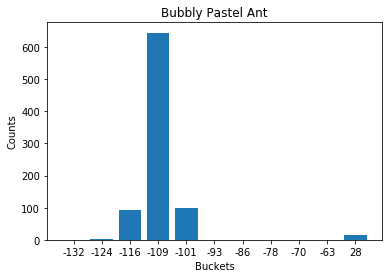

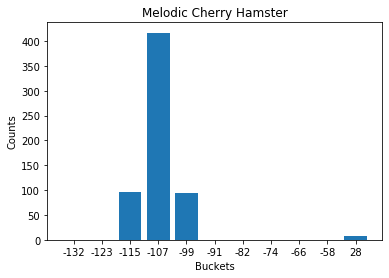

Plotting witnesses for: ripe-porcelain-stallion


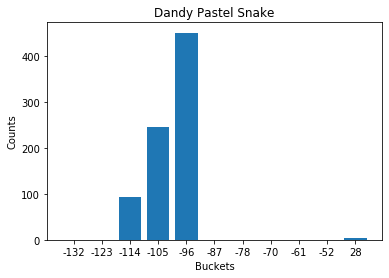

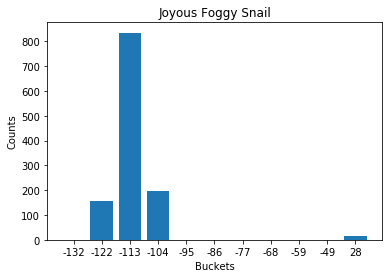

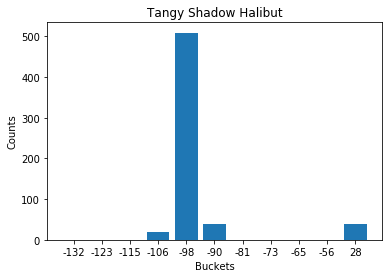

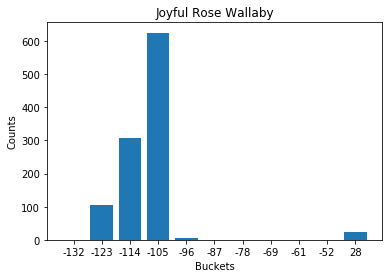

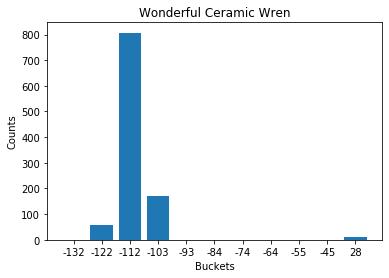

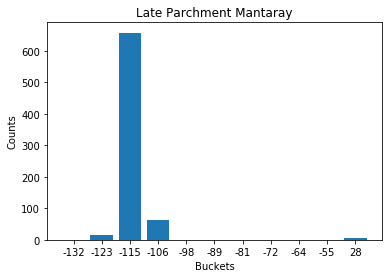

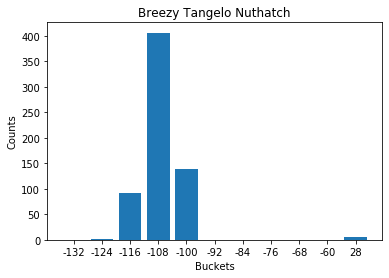

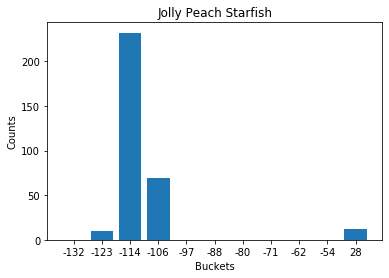

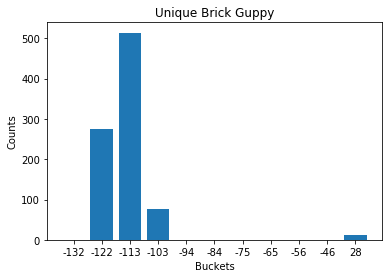

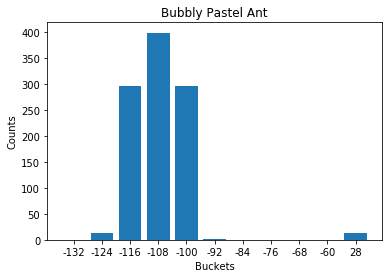

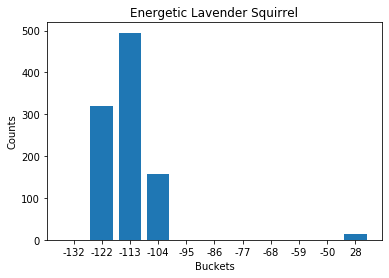

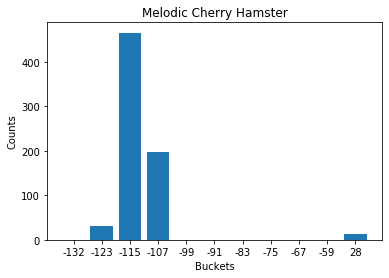

Plotting witnesses for: breezy-tangelo-nuthatch


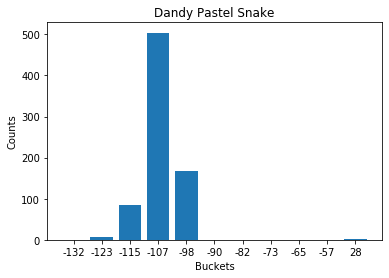

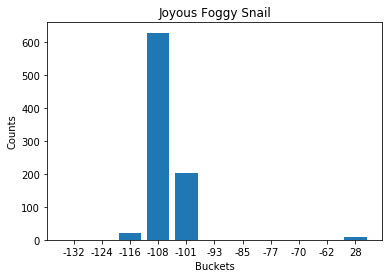

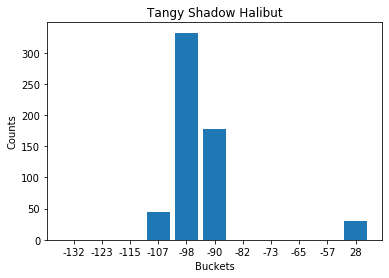

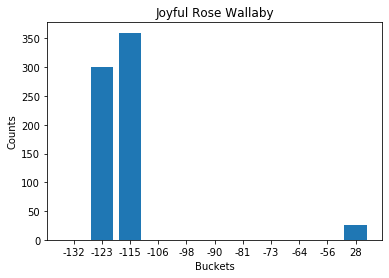

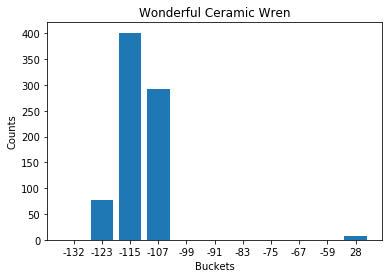

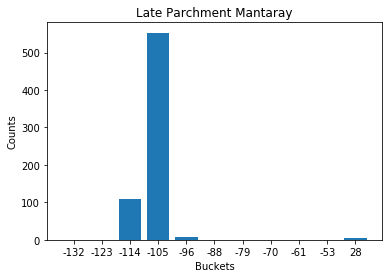

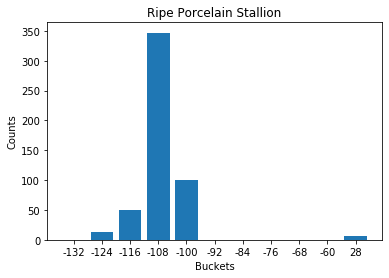

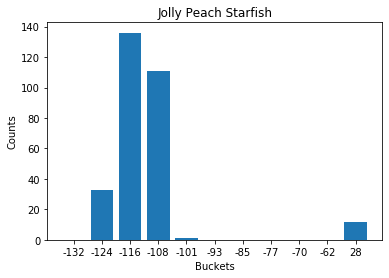

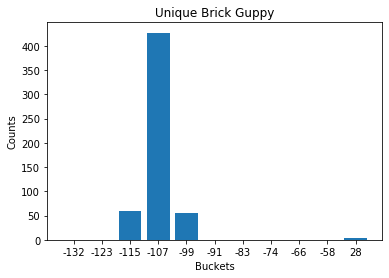

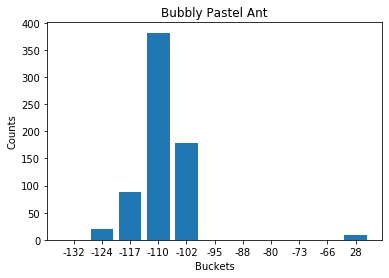

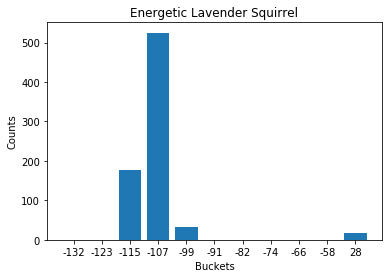

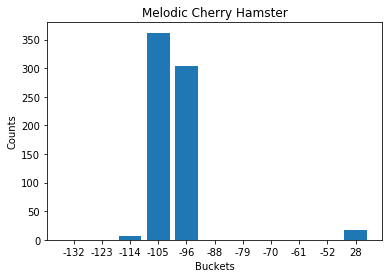

Plotting witnesses for: clumsy-midnight-wren


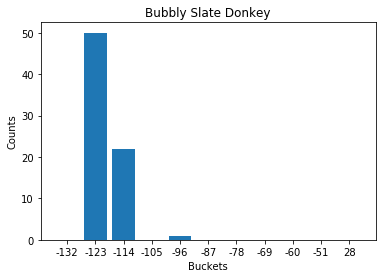

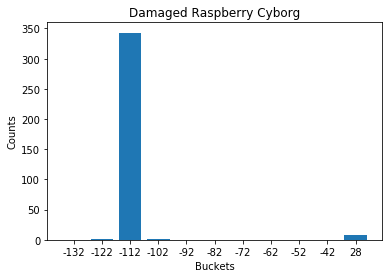

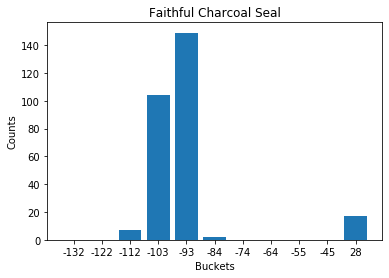

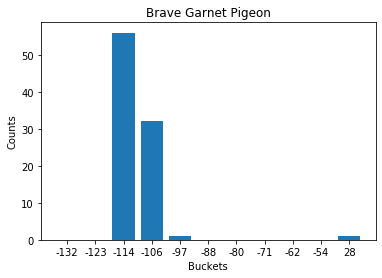

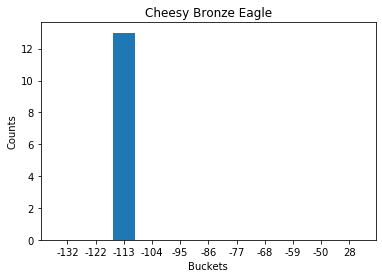

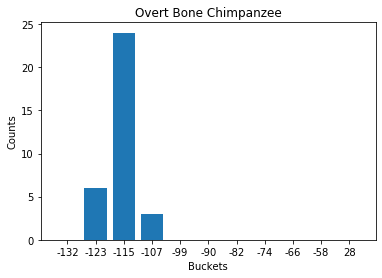

Plotting witnesses for: late-parchment-mantaray


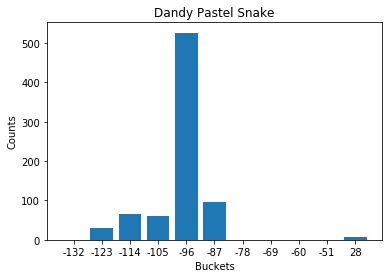

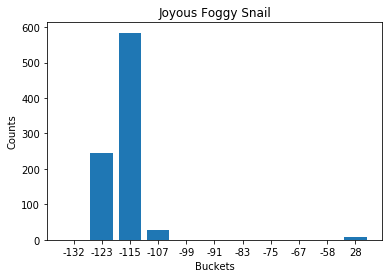

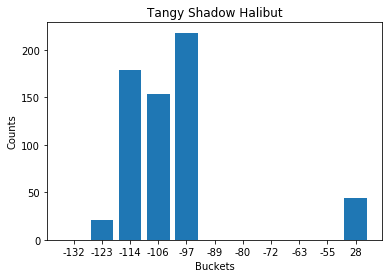

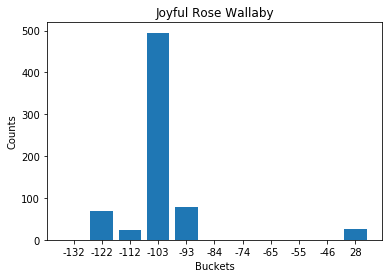

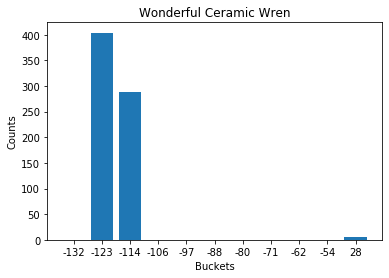

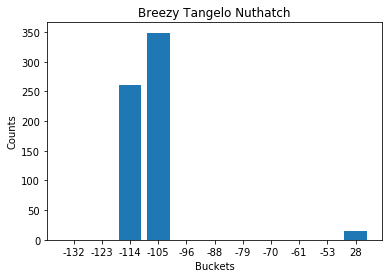

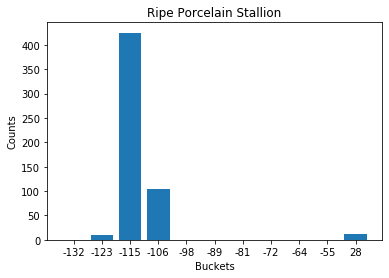

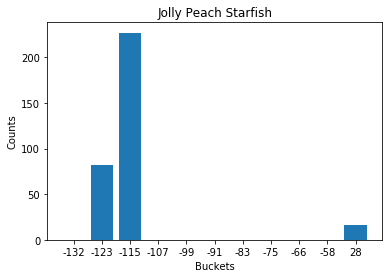

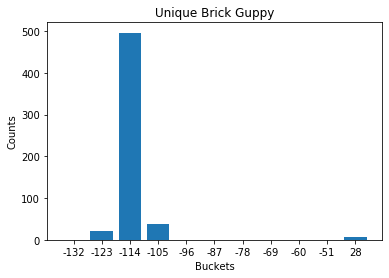

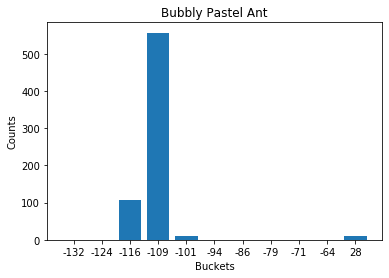

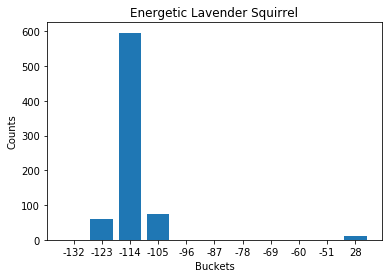

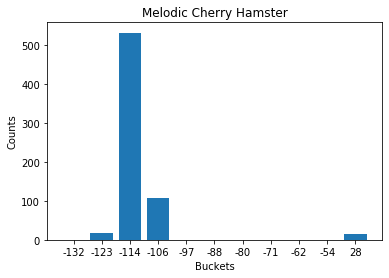

Plotting witnesses for: wonderful-ceramic-wren


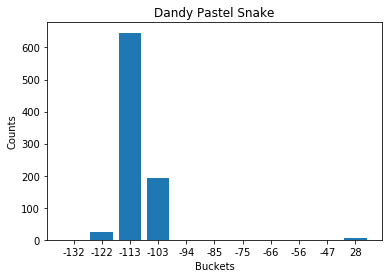

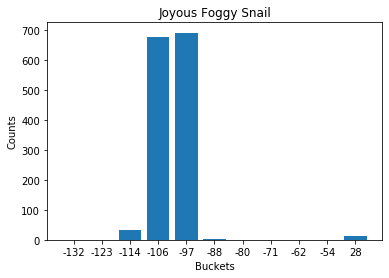

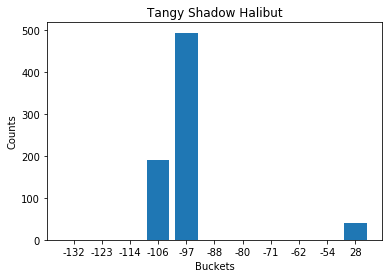

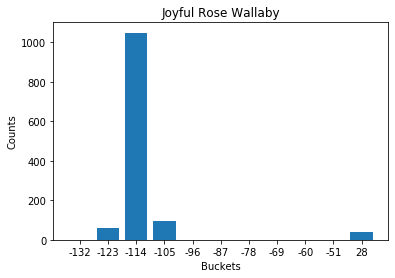

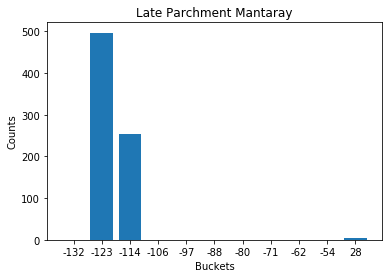

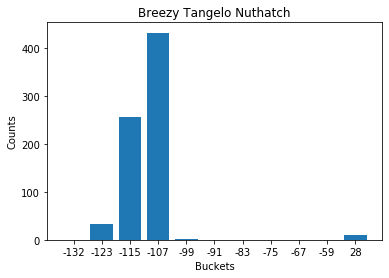

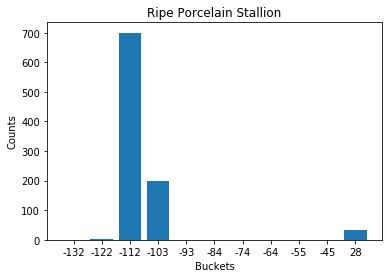

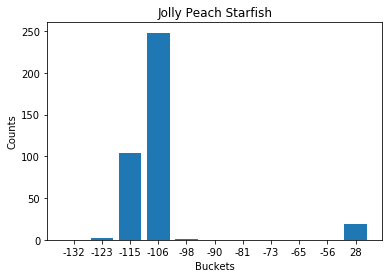

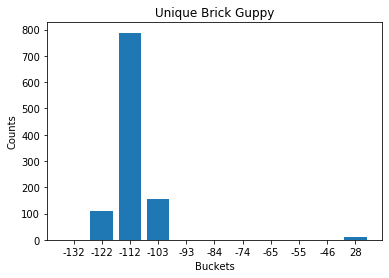

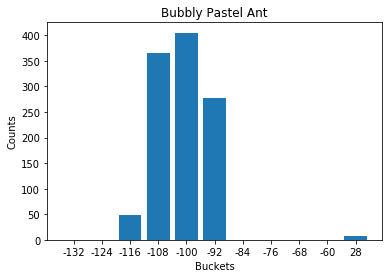

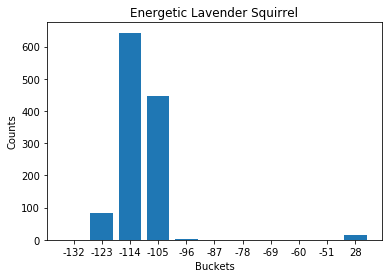

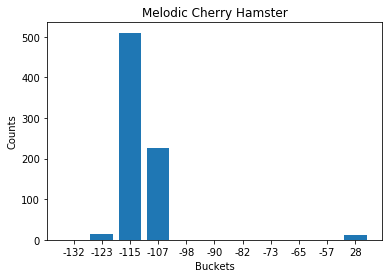

Plotting witnesses for: joyful-rose-wallaby


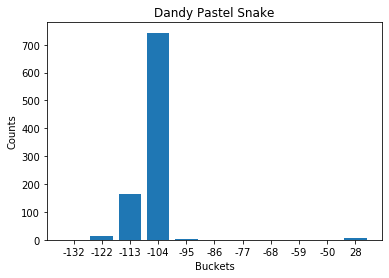

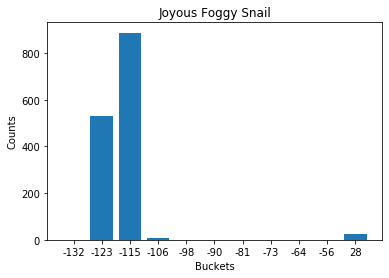

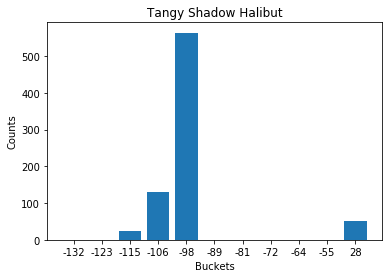

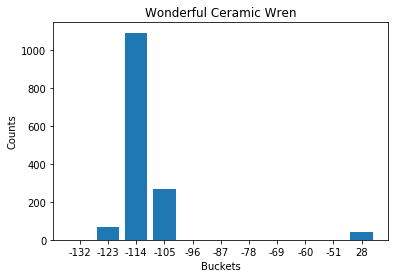

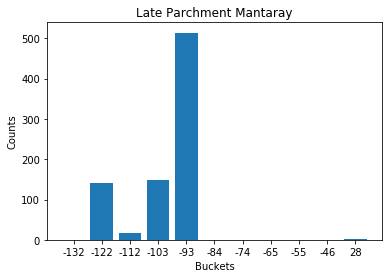

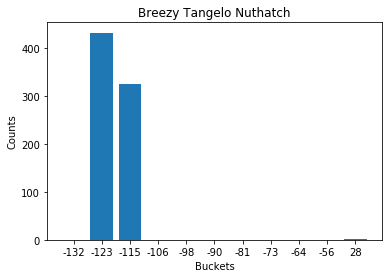

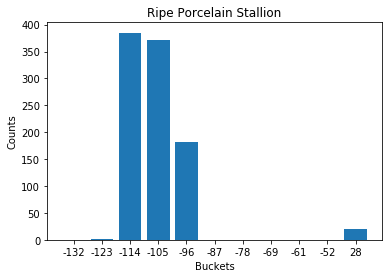

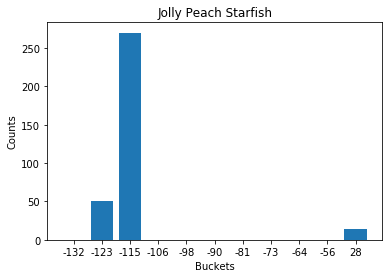

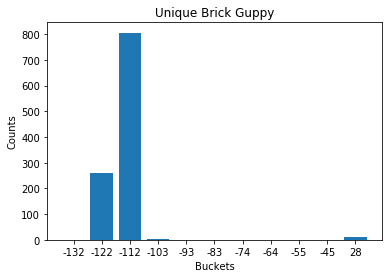

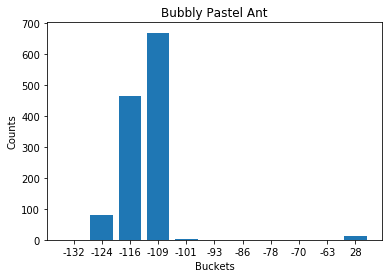

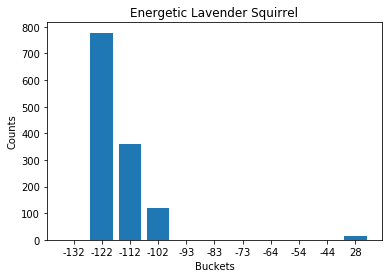

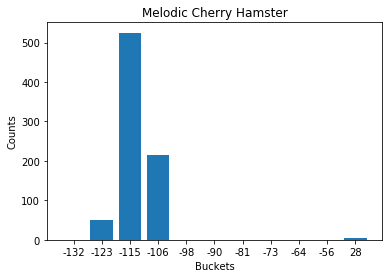

Plotting witnesses for: dandy-pastel-snake


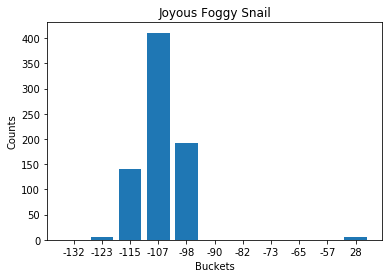

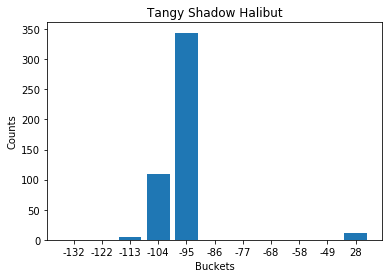

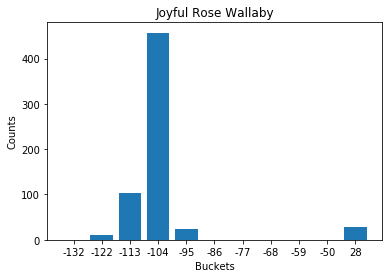

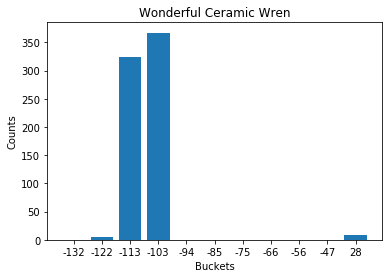

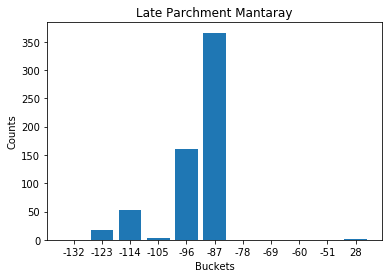

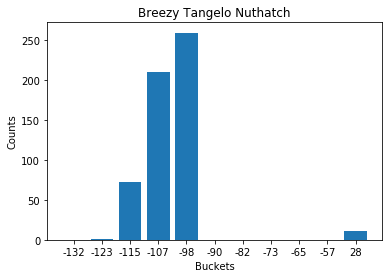

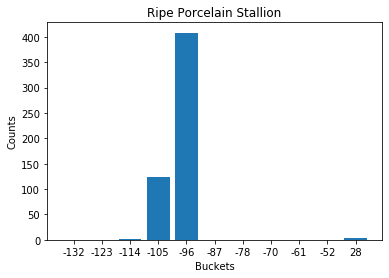

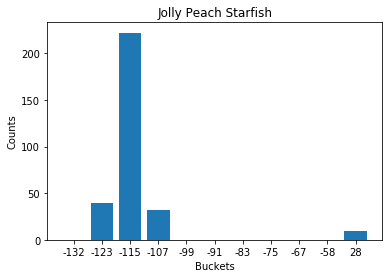

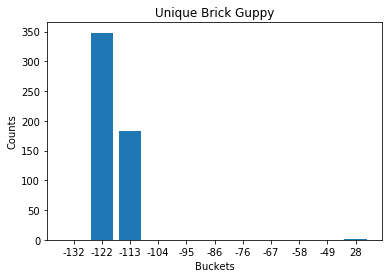

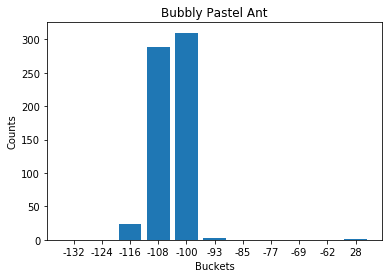

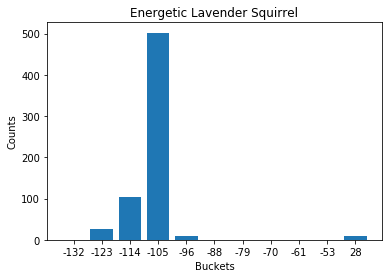

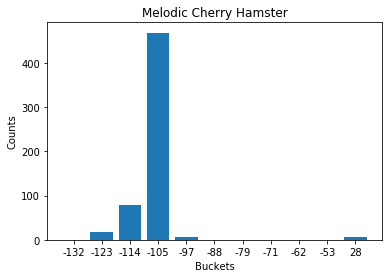

Plotting witnesses for: unique-brick-guppy


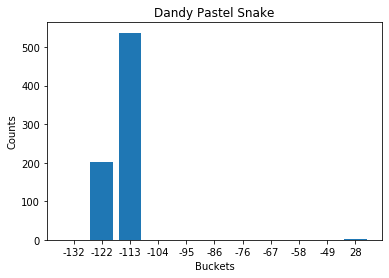

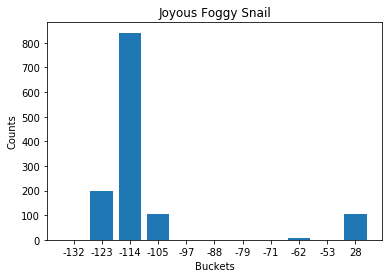

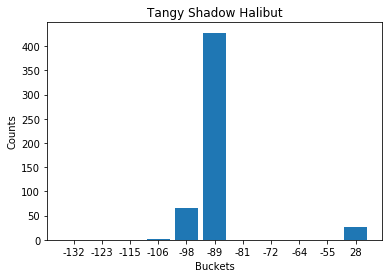

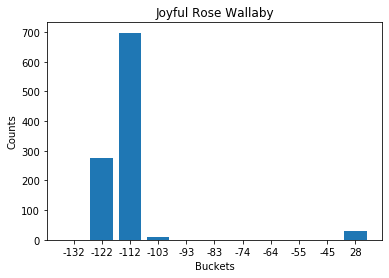

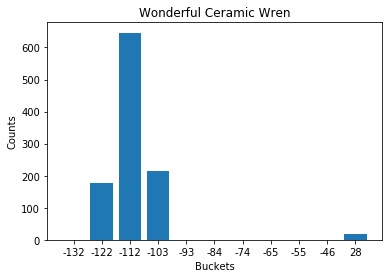

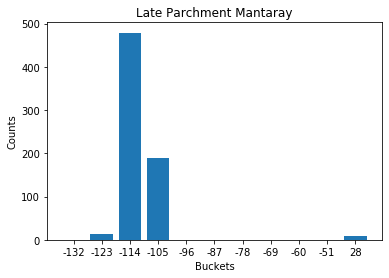

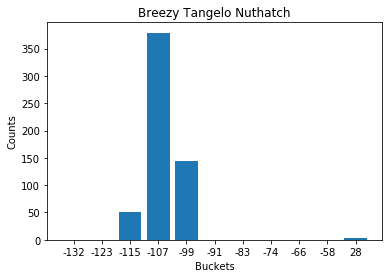

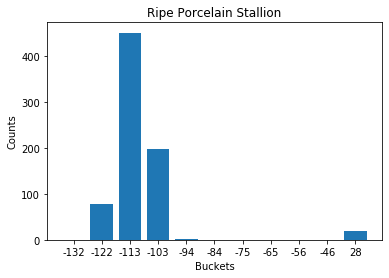

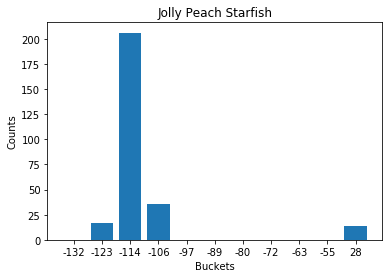

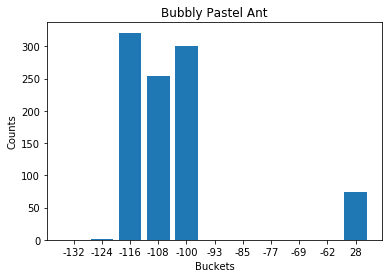

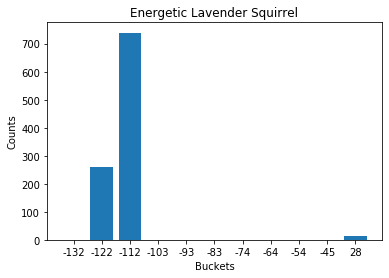

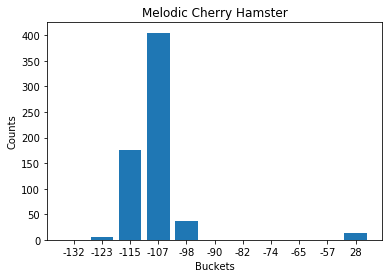

Plotting witnesses for: jolly-peach-starfish


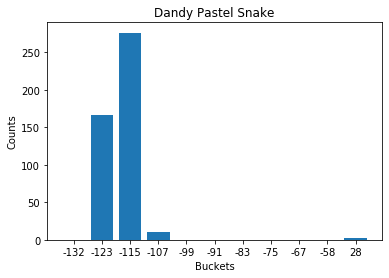

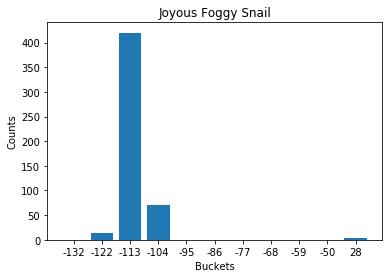

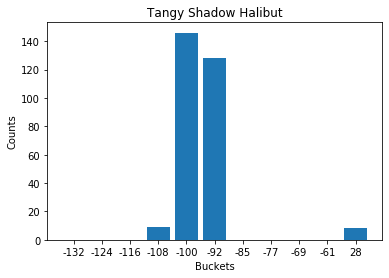

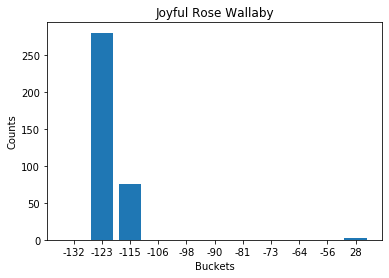

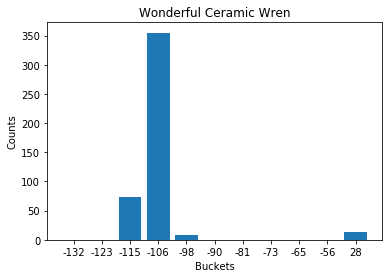

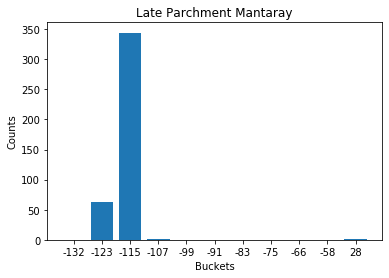

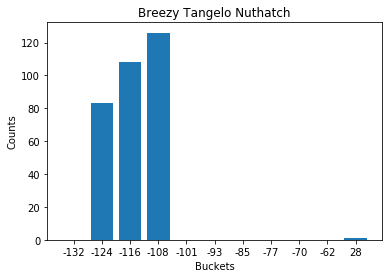

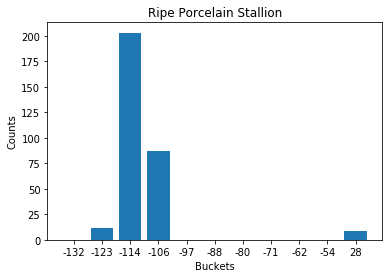

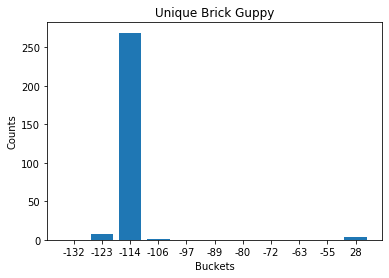

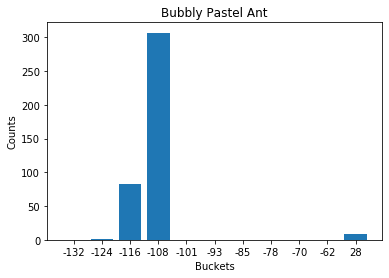

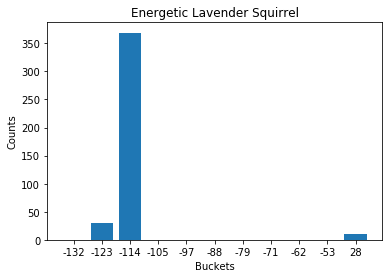

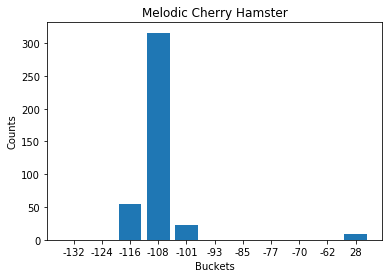

Plotting witnesses for: joyous-foggy-snail


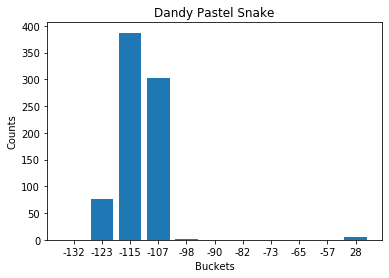

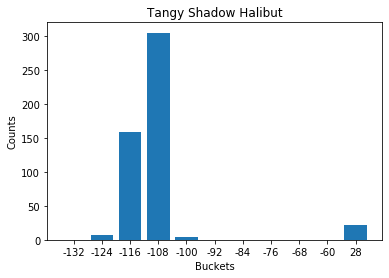

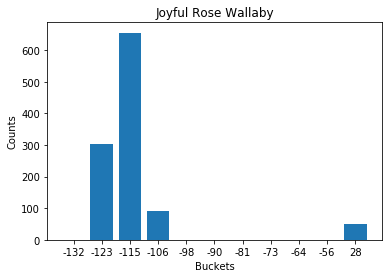

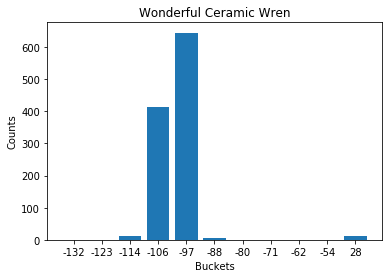

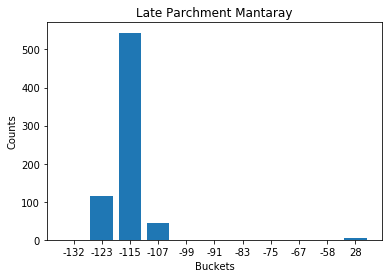

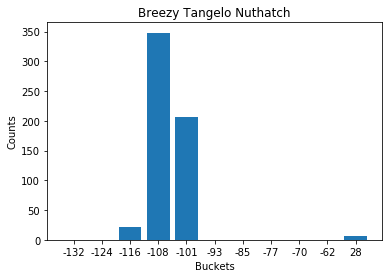

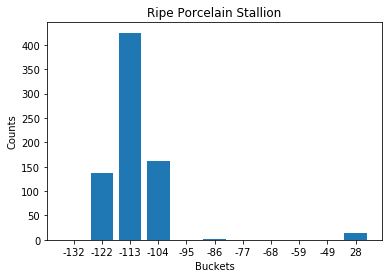

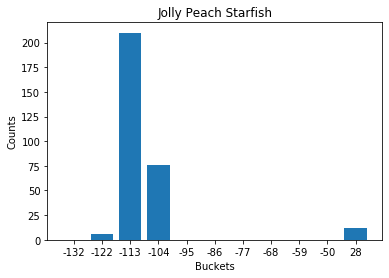

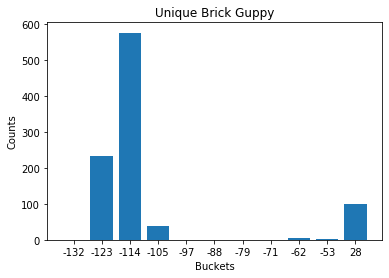

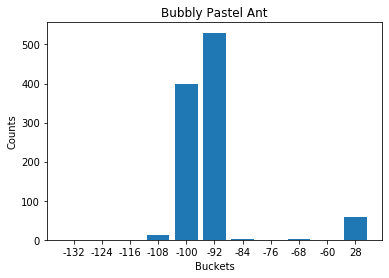

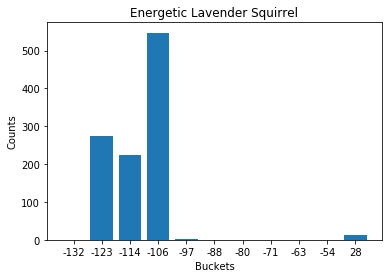

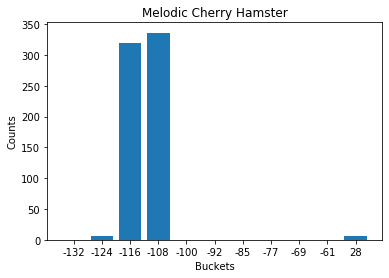

Plotting witnesses for: bubbly-pastel-ant


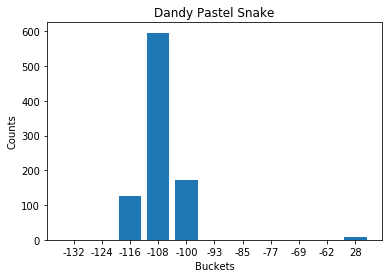

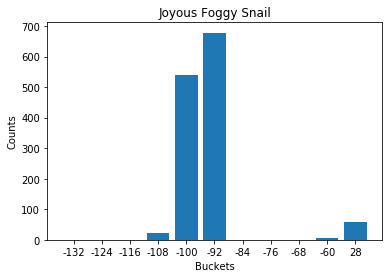

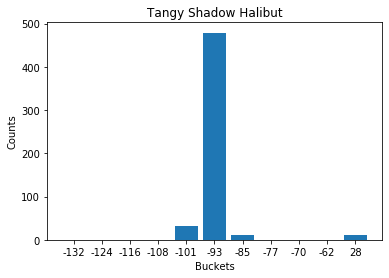

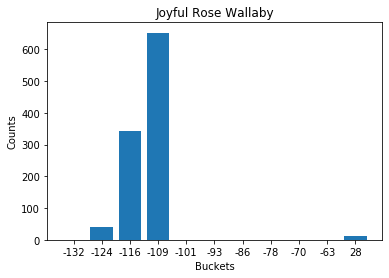

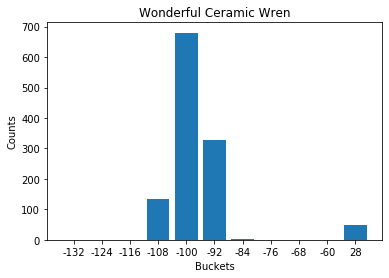

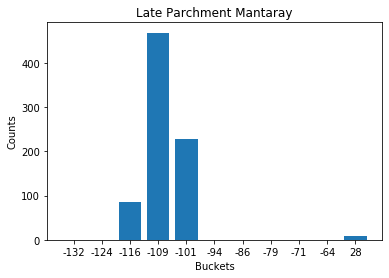

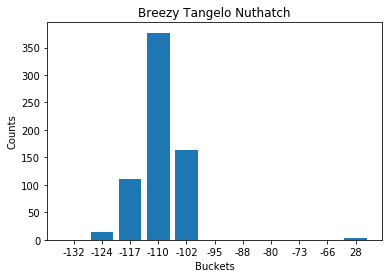

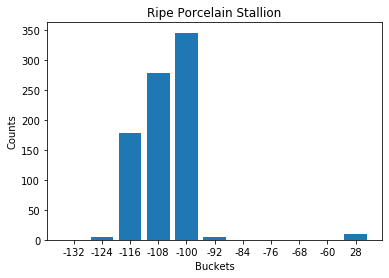

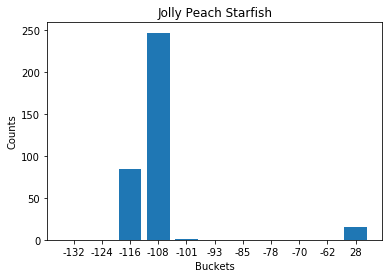

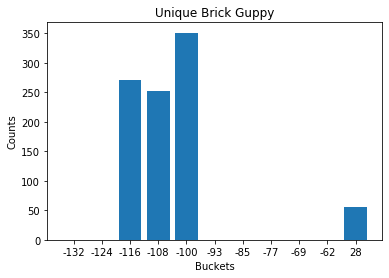

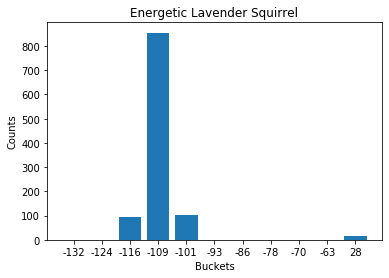

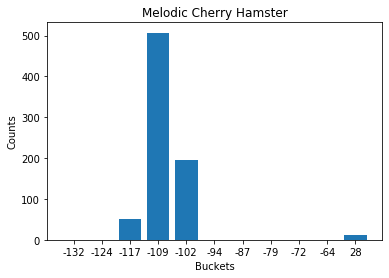

In [11]:
for h in hotspots:
    print('Plotting witnesses for: {}'.format(h))
    plot_witnesses_for(h)